In [48]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

## Writing a Neural Network From Scratch

It is generally suggested to write a neural network once to understand it better. So, this is my try. My attempt to say a `Hello World!`  

### Load Data
MNIST data is available in `keras` module. I am importing that module just for having the data.

In [80]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### See one Example

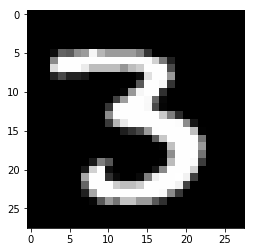

In [81]:
plt.gray()
plt.imshow(x_train[12])

### Normalization

In [82]:
# normalization
x_train = x_train/255
x_test = x_test/255

### Reshape

In [83]:
# number of training examples
m_train = x_train.shape[0]
m_test = x_test.shape[0]
x_train = x_train.reshape(m_train, 28*28).T
x_test = x_test.reshape(m_test, 28*28).T

#### Visualize Reshaping
Every digit is in a column. Fist 1000 column can be visualized as follows:

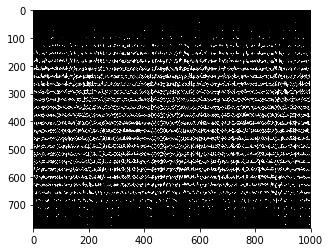

In [84]:
plt.imshow(x_train[:,:1000])

## One Hot Encoding of the Labels
Converting categories into a binary matrix.  
Below is the `encode` function but this can also be done with `keras.utils.to_categorical` function.

To illustrate: $[1,2,1,0]$ will be converted into

\begin{bmatrix} 
 0 & 1 & 0 & \\
 0 & 0 & 1 & \\
 0 & 1 & 0 & \\
 1 & 0 & 0 & \\
\end{bmatrix}

In [54]:
def encode(y, num_labels):
    """One hot encoding"""
    num_samples = y.shape[0]
    onehot_matrix = np.zeros((num_labels, num_samples))
    for index, value in enumerate(y):
        onehot_matrix[value, index] = 1.0
    
    return onehot_matrix

In [55]:
y_train = encode(y_train, 10)
y_test = encode(y_test, 10)

# Activation Function
Standard logistic regression as the activation function:
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [56]:
def sigmoid(x):
    """
    Activation function
    """
    return(np.divide(1, np.add(1, np.exp(-x))))

# Forward Propogation
$$Z^{[1]} = W_1^{T}X+b$$
$$a^{[1]} = \sigma(Z^{[1]})$$
$$Z^{[2]} = W_2^{T}a^{[1]}+b$$
$$a^{[2]} = \sigma(Z^{[2]})$$
$$...$$
$$Z^{[l]} = W_l^{T}a^{[l]}+b$$
$$a^{[l]} = \sigma(Z^{[l]})$$

In [28]:
def forward_propogate(X, W1, b1, W2, b2):
    """
    Takes input and weights, applies transformation. 
    """
    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    parameters = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return(parameters)

## Compute Cost


Using [Cross Entropy Loss](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html#id11):
$$ \mathcal{L}(a^{[i]}, y) = -{(y\log(a^{[i]}) + (1 - y)\log(1 - a^{[i]}))}$$

Define cost as folows: $$-\frac{1}{m} \sum\limits_{i=0}^{m} \mathcal{L}(a^{[i]}, y)$$

In [29]:
def compute_cost(Y, A2):
    """
    Takes the final hidden layer and true values, returns cross entropy cost
    """
    L = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = - np.sum(L) / m
    return(cost)

## Compute Gradients
Hard part!

In [30]:
def compute_gradients(Y, A2, W2, Z1, X):
    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        'dW2' : dW2,
        'db2' : db2,
        'dW1' : dW1,
        'db1' : db1
    }
    return(grads)

## Model

In [42]:
n_x = x_train.shape[0]
n_h = 64
learning_rate = 1
n_label = 10

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_label, n_h)
b2 = np.zeros((n_label, 1))

X = x_train
Y = y_train
m = m_train

for i in range(1000):

    # forward propogation
    parameters = forward_propogate(X, W1, b1, W2, b2)
    Z1 = parameters['Z1']
    A1 = parameters['A1']
    Z2 = parameters['Z2']
    A2 = parameters['A2']

    # compute cost
    cost = compute_cost(Y, A2)

    # compute gradients
    grads = compute_gradients(Y, A2, W2, Z1, X)
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    
    # update parameters
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    if (i % 100 == 0):
        print("Iteration", i, "cost: ", cost)

print("Final cost:", cost)

Iteration 0 cost:  9.597109779414502
Iteration 100 cost:  1.2215026334596233
Iteration 200 cost:  0.932983757461638
Iteration 300 cost:  0.8055212117164624
Iteration 400 cost:  0.7281874796154029
Iteration 500 cost:  0.6745816172275626
Iteration 600 cost:  0.6342872753454057
Iteration 700 cost:  0.602329789641002
Iteration 800 cost:  0.5759886197940833
Iteration 900 cost:  0.5536389102126419
Final cost: 0.5344430517777368


## Testing the Accuracy

In [43]:
def predict(X):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    return(A2)

In [102]:
predictions = predict(x_test)

In [103]:
predictions = np.argmax(np.round(predictions).T, axis=1)

### Error

In [104]:
abs(np.sum(predictions-y_test))/10000

0.2141